In [1]:
from preamble import *

In [ ]:
df = pd.read_csv('./data/j_weather_data_v2.csv', index_col=0)
print(type(df), df.shape)

<class 'pandas.core.frame.DataFrame'> (15739, 8)


In [3]:
df.head()

,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,snow,outflow,input
datetime,,,,,,,,
2023-01-01 00:00:00,-0.9,0.0,1.4,72.0,1023.6,0.0,4672.98,6063.02
2023-01-01 01:00:00,-1.3,0.0,1.5,74.0,1023.3,0.0,6425.49,7195.35
2023-01-01 02:00:00,-1.7,0.0,1.4,75.0,1023.1,0.0,8620.11,7472.46
2023-01-01 03:00:00,-2.0,0.0,1.2,77.0,1023.3,0.0,8697.04,4809.88
2023-01-01 04:00:00,-2.0,0.0,1.7,79.0,1022.8,0.0,9543.70,6292.50


In [4]:
feature = df.reset_index()
# feature = df_reset.drop(columns=['output_flow'])
target = df['outflow'].values.reshape(-1, 1)
feature.shape, target.shape

((15739, 9), (15739, 1))

In [5]:
feature

,datetime,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,snow,outflow,input
0,2023-01-01 00:00:00,-0.9,0.0,1.4,72.0,1023.6,0.0,4672.98,6063.02
1,2023-01-01 01:00:00,-1.3,0.0,1.5,74.0,1023.3,0.0,6425.49,7195.35
2,2023-01-01 02:00:00,-1.7,0.0,1.4,75.0,1023.1,0.0,8620.11,7472.46
3,2023-01-01 03:00:00,-2.0,0.0,1.2,77.0,1023.3,0.0,8697.04,4809.88
4,2023-01-01 04:00:00,-2.0,0.0,1.7,79.0,1022.8,0.0,9543.70,6292.50
...,...,...,...,...,...,...,...,...,...
15734,2024-10-17 14:00:00,25.7,0.0,0.9,52.0,1013.3,0.0,11705.70,7130.56
15735,2024-10-17 15:00:00,26.0,0.0,0.2,47.0,1013.0,0.0,9027.35,6876.49
15736,2024-10-17 16:00:00,26.1,0.0,0.3,49.0,1012.8,0.0,8719.41,7014.71
15737,2024-10-17 17:00:00,25.3,0.0,0.2,51.0,1012.9,0.0,2606.70,2500.51


In [6]:
feature['datetime'] = pd.to_datetime(feature['datetime'])

In [7]:
import holidays

kr_holidays = holidays.KR()
feature['is_weekend'] = feature['datetime'].dt.dayofweek >= 5 | feature['datetime'].isin(kr_holidays)
feature.head()

,datetime,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,snow,outflow,input,is_weekend
0,2023-01-01 00:00:00,-0.9,0.0,1.4,72.0,1023.6,0.0,4672.98,6063.02,True
1,2023-01-01 01:00:00,-1.3,0.0,1.5,74.0,1023.3,0.0,6425.49,7195.35,True
2,2023-01-01 02:00:00,-1.7,0.0,1.4,75.0,1023.1,0.0,8620.11,7472.46,True
3,2023-01-01 03:00:00,-2.0,0.0,1.2,77.0,1023.3,0.0,8697.04,4809.88,True
4,2023-01-01 04:00:00,-2.0,0.0,1.7,79.0,1022.8,0.0,9543.70,6292.50,True


In [8]:
import torch
import torch.nn as nn

torch.__version__, torch.cuda.is_available()

('2.5.1', True)

In [9]:
train_size = int(feature.shape[0] * 0.7)

trainset_feature = feature[:train_size]
trainset_target = target[:train_size]
testset_feature = feature[train_size:]
testset_target = target[train_size:]
print(trainset_feature.shape, testset_feature.shape)

(11017, 10) (4722, 10)


In [10]:
def create_time_feature(df): 
  df['dayofmonth'] = df['datetime'].dt.day 
  df['dayofweek'] = df['datetime'].dt.dayofweek 
  df['quarter'] = df['datetime'].dt.quarter 
  df['month'] = df['datetime'].dt.month 
  df['year'] = df['datetime'].dt.year 
  df['dayofyear'] = df['datetime'].dt.dayofyear 
  df['week'] = df['datetime'].dt.isocalendar().week
  df['hour'] = df['datetime'].dt.hour
  df['minute'] = df['datetime'].dt.minute
  df['second'] = df['datetime'].dt.second
  return df

In [11]:
trainset_feature = create_time_feature(trainset_feature)
testset_feature = create_time_feature(testset_feature)

C:\Users\user\AppData\Local\Temp\ipykernel_6656\1880899018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofmonth'] = df['datetime'].dt.day
C:\Users\user\AppData\Local\Temp\ipykernel_6656\1880899018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['datetime'].dt.dayofweek
C:\Users\user\AppData\Local\Temp\ipykernel_6656\1880899018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [12]:
trainset_feature.drop('datetime', axis=1, inplace=True)
testset_feature.drop('datetime', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6656\419025515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset_feature.drop('datetime', axis=1, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6656\419025515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset_feature.drop('datetime', axis=1, inplace=True)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_feature = MinMaxScaler()
train_feature_scaled = scaler_feature.fit_transform(trainset_feature)
test_feature_scaled = scaler_feature.transform(testset_feature)

scaler_target = MinMaxScaler()
train_target_scaled = scaler_target.fit_transform(trainset_target)
test_target_scaled = scaler_target.transform(testset_target)

In [14]:
from tqdm import tqdm

def split_dataset(data, target, seq_len):
  X, y  = [], []
  for i in tqdm(range(data.shape[0]-(seq_len))):
    X.append(data[i:i+seq_len, :]) 
    y.append(target[i+seq_len])
  return np.array(X), np.array(y)

seq_len = 60

In [15]:
X_train, y_train = split_dataset(train_feature_scaled, train_target_scaled, seq_len)

100%|██████████| 10957/10957 [00:00<00:00, 1368785.97it/s]


In [16]:
X_train.shape, y_train.shape

((10957, 60, 19), (10957, 1))

In [17]:
X_test, y_test = split_dataset(test_feature_scaled, test_target_scaled, seq_len)

100%|██████████| 4662/4662 [00:00<00:00, 1378779.10it/s]


In [18]:
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10957, 60, 19), (10957, 1), (4662, 60, 19), (4662, 1))

In [20]:
X_train_tensor, y_train_tensor = torch.tensor(X_train).float(), torch.tensor(y_train).float()
X_test_tensor, y_test_tensor = torch.tensor(X_test).float(), torch.tensor(y_test).float()

In [21]:
from torch.utils.data import DataLoader, TensorDataset

loader_train = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), shuffle=True,
                                           batch_size=128)
loader_test = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), shuffle=False,
                                          batch_size=128)

In [22]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTMModel, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    lstm_out, _ = self.lstm(x)
    last_out = lstm_out[:, -1, :]
    out = self.fc(last_out)
    return out

input_size = 19
hidden_size = 50
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)


In [23]:
for I, label in loader_train:
  print(model(I)[0], label[0])
  break

tensor([-0.2068], grad_fn=<SelectBackward0>) tensor([0.4961])


In [24]:
import torch.optim as optim

# loss_fn = torch.nn.MSELoss(reduction='mean')
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
num_epochs = 200
# loss_history = []
model.train()
model.to(device)
for epoch in range(num_epochs):
  running_loss = 0.0
  for X_batch, y_batch in loader_train:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

    out = model(X_batch)
    loss = loss_fn(out, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  # loss_history.append(running_loss / len(loader_train.dataset))
  print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(loader_train.dataset):.8f}")

Epoch [1/200], Loss: 0.00042472
Epoch [2/200], Loss: 0.00012540
Epoch [3/200], Loss: 0.00008969
Epoch [4/200], Loss: 0.00007061
Epoch [5/200], Loss: 0.00006714
Epoch [6/200], Loss: 0.00006370
Epoch [7/200], Loss: 0.00006048
Epoch [8/200], Loss: 0.00005717
Epoch [9/200], Loss: 0.00005376
Epoch [10/200], Loss: 0.00005194
Epoch [11/200], Loss: 0.00004926
Epoch [12/200], Loss: 0.00004726
Epoch [13/200], Loss: 0.00004598
Epoch [14/200], Loss: 0.00004576
Epoch [15/200], Loss: 0.00004508
Epoch [16/200], Loss: 0.00004544
Epoch [17/200], Loss: 0.00004433
Epoch [18/200], Loss: 0.00004435
Epoch [19/200], Loss: 0.00004434
Epoch [20/200], Loss: 0.00004423
Epoch [21/200], Loss: 0.00004420
Epoch [22/200], Loss: 0.00004389
Epoch [23/200], Loss: 0.00004451
Epoch [24/200], Loss: 0.00004427
Epoch [25/200], Loss: 0.00004372
Epoch [26/200], Loss: 0.00004399
Epoch [27/200], Loss: 0.00004385
Epoch [28/200], Loss: 0.00004374
Epoch [29/200], Loss: 0.00004401
Epoch [30/200], Loss: 0.00004361
Epoch [31/200], Los

In [27]:
model.eval()

y_pred_list = []
with torch.no_grad():
  for X_batch, _ in loader_test:
    X_batch = X_batch.to(device)
    # y_pred = model(X_batch).numpy()
    y_pred = model(X_batch).cpu().numpy()
    y_pred_list.append(y_pred)

y_pred = np.concatenate(y_pred_list, axis=0)

RMSE : 0.11149055333279168, RMSE_ORI : 2127.026452489001 R-value : 0.2803862183139071


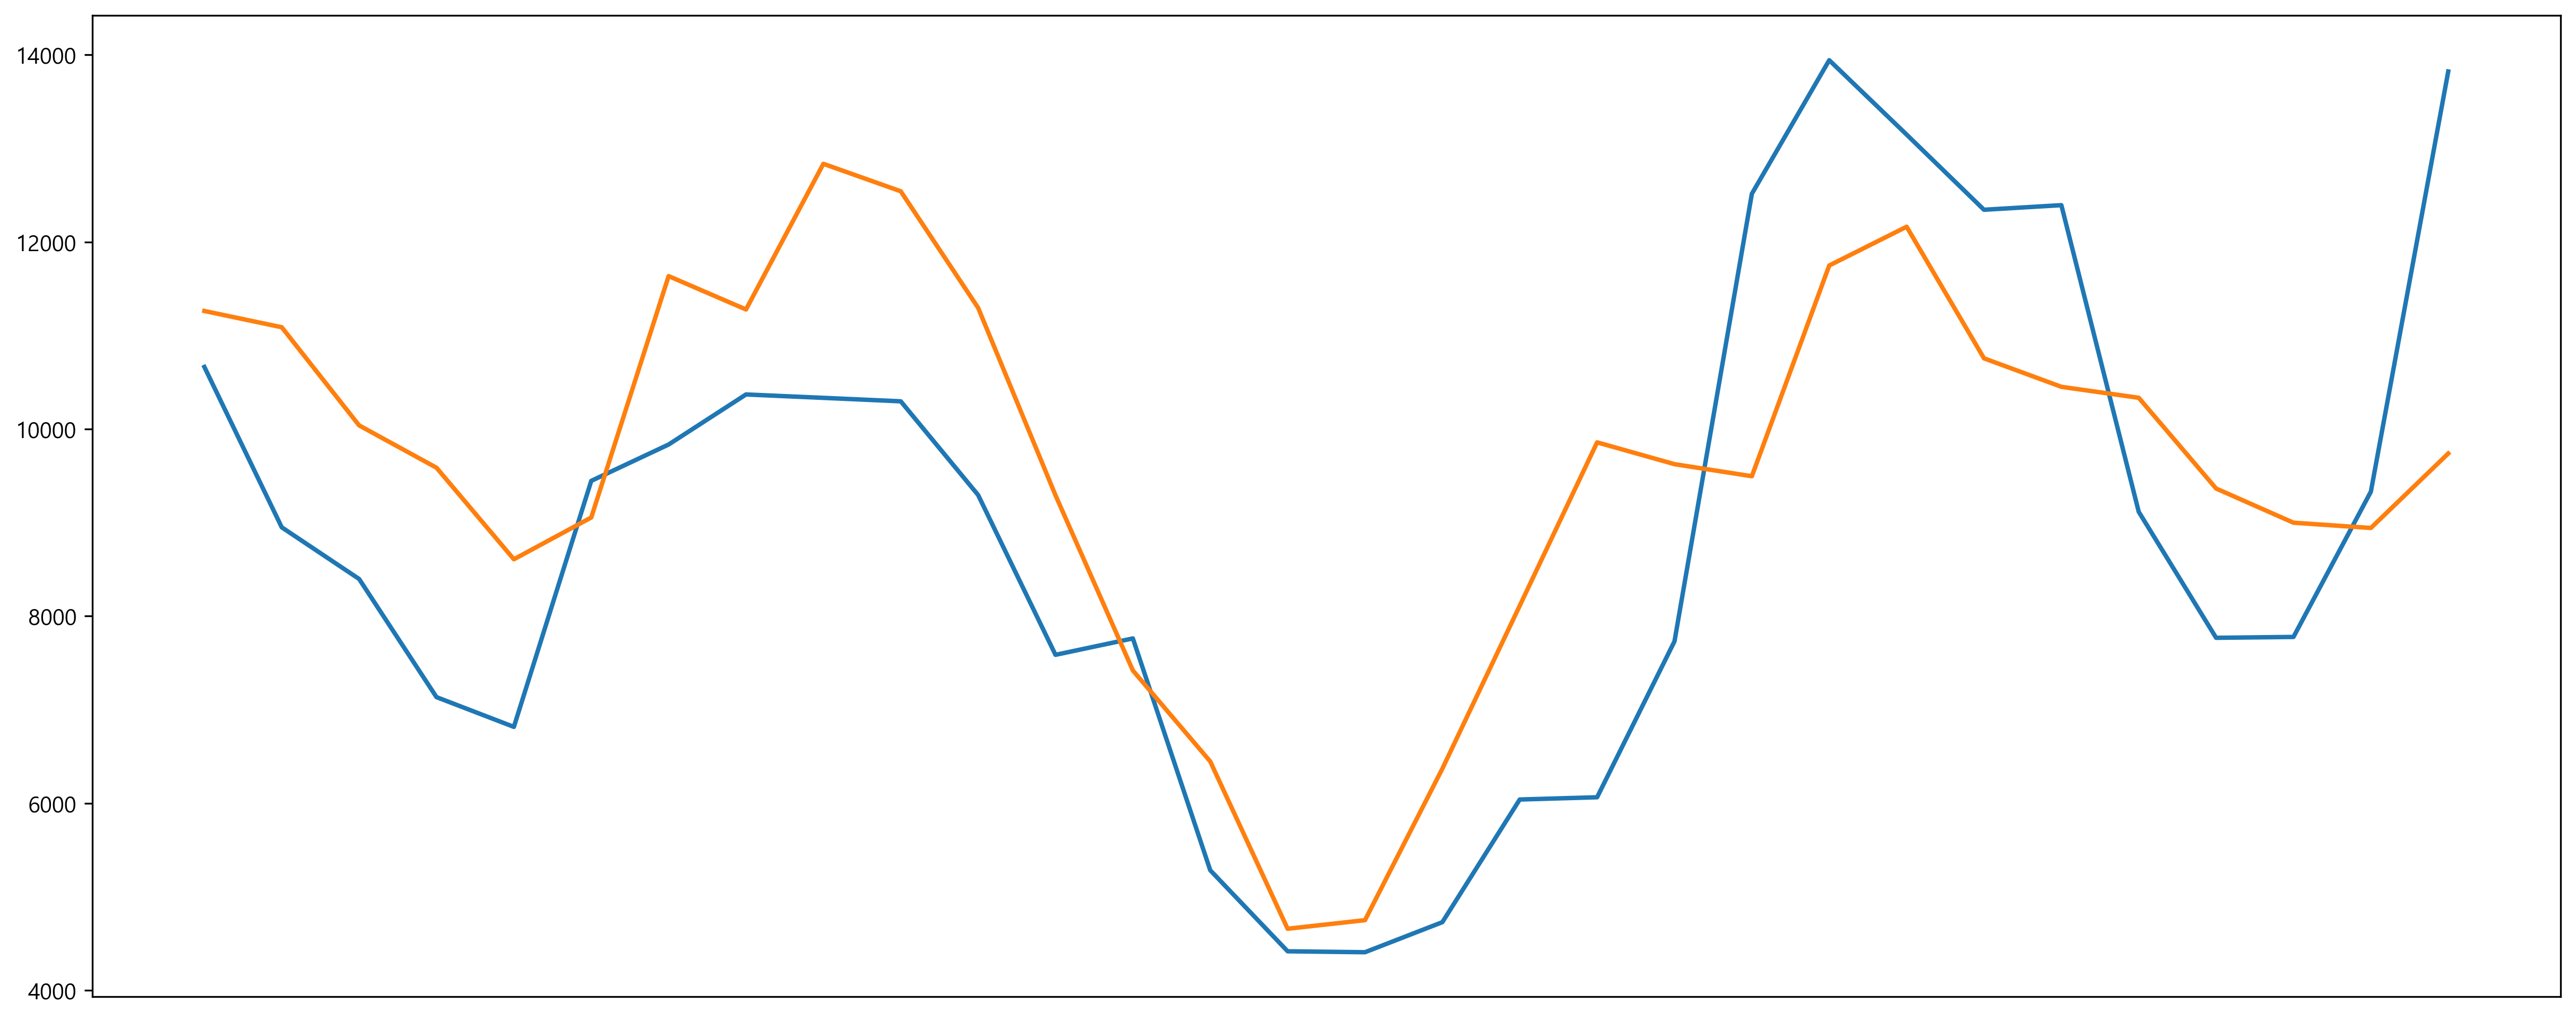

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_test_ori = scaler_target.inverse_transform(y_test)
y_pred_ori = scaler_target.inverse_transform(y_pred)

mse = mean_squared_error(y_test, y_pred)
mse_ori = mean_squared_error(y_test_ori, y_pred_ori)
rmse = np.sqrt(mse)
rmse_ori = np.sqrt(mse_ori)
r2 = r2_score(y_test, y_pred)
print(f'RMSE : {rmse}, RMSE_ORI : {rmse_ori} R-value : {r2}')

plt.figure(figsize=(20, 8))
plt.xticks([])
plt.plot(df.index[train_size + seq_len:train_size + seq_len + 30], y_test_ori[:30])
plt.plot(df.index[train_size + seq_len:train_size + seq_len + 30], y_pred_ori[:30])
plt.show()

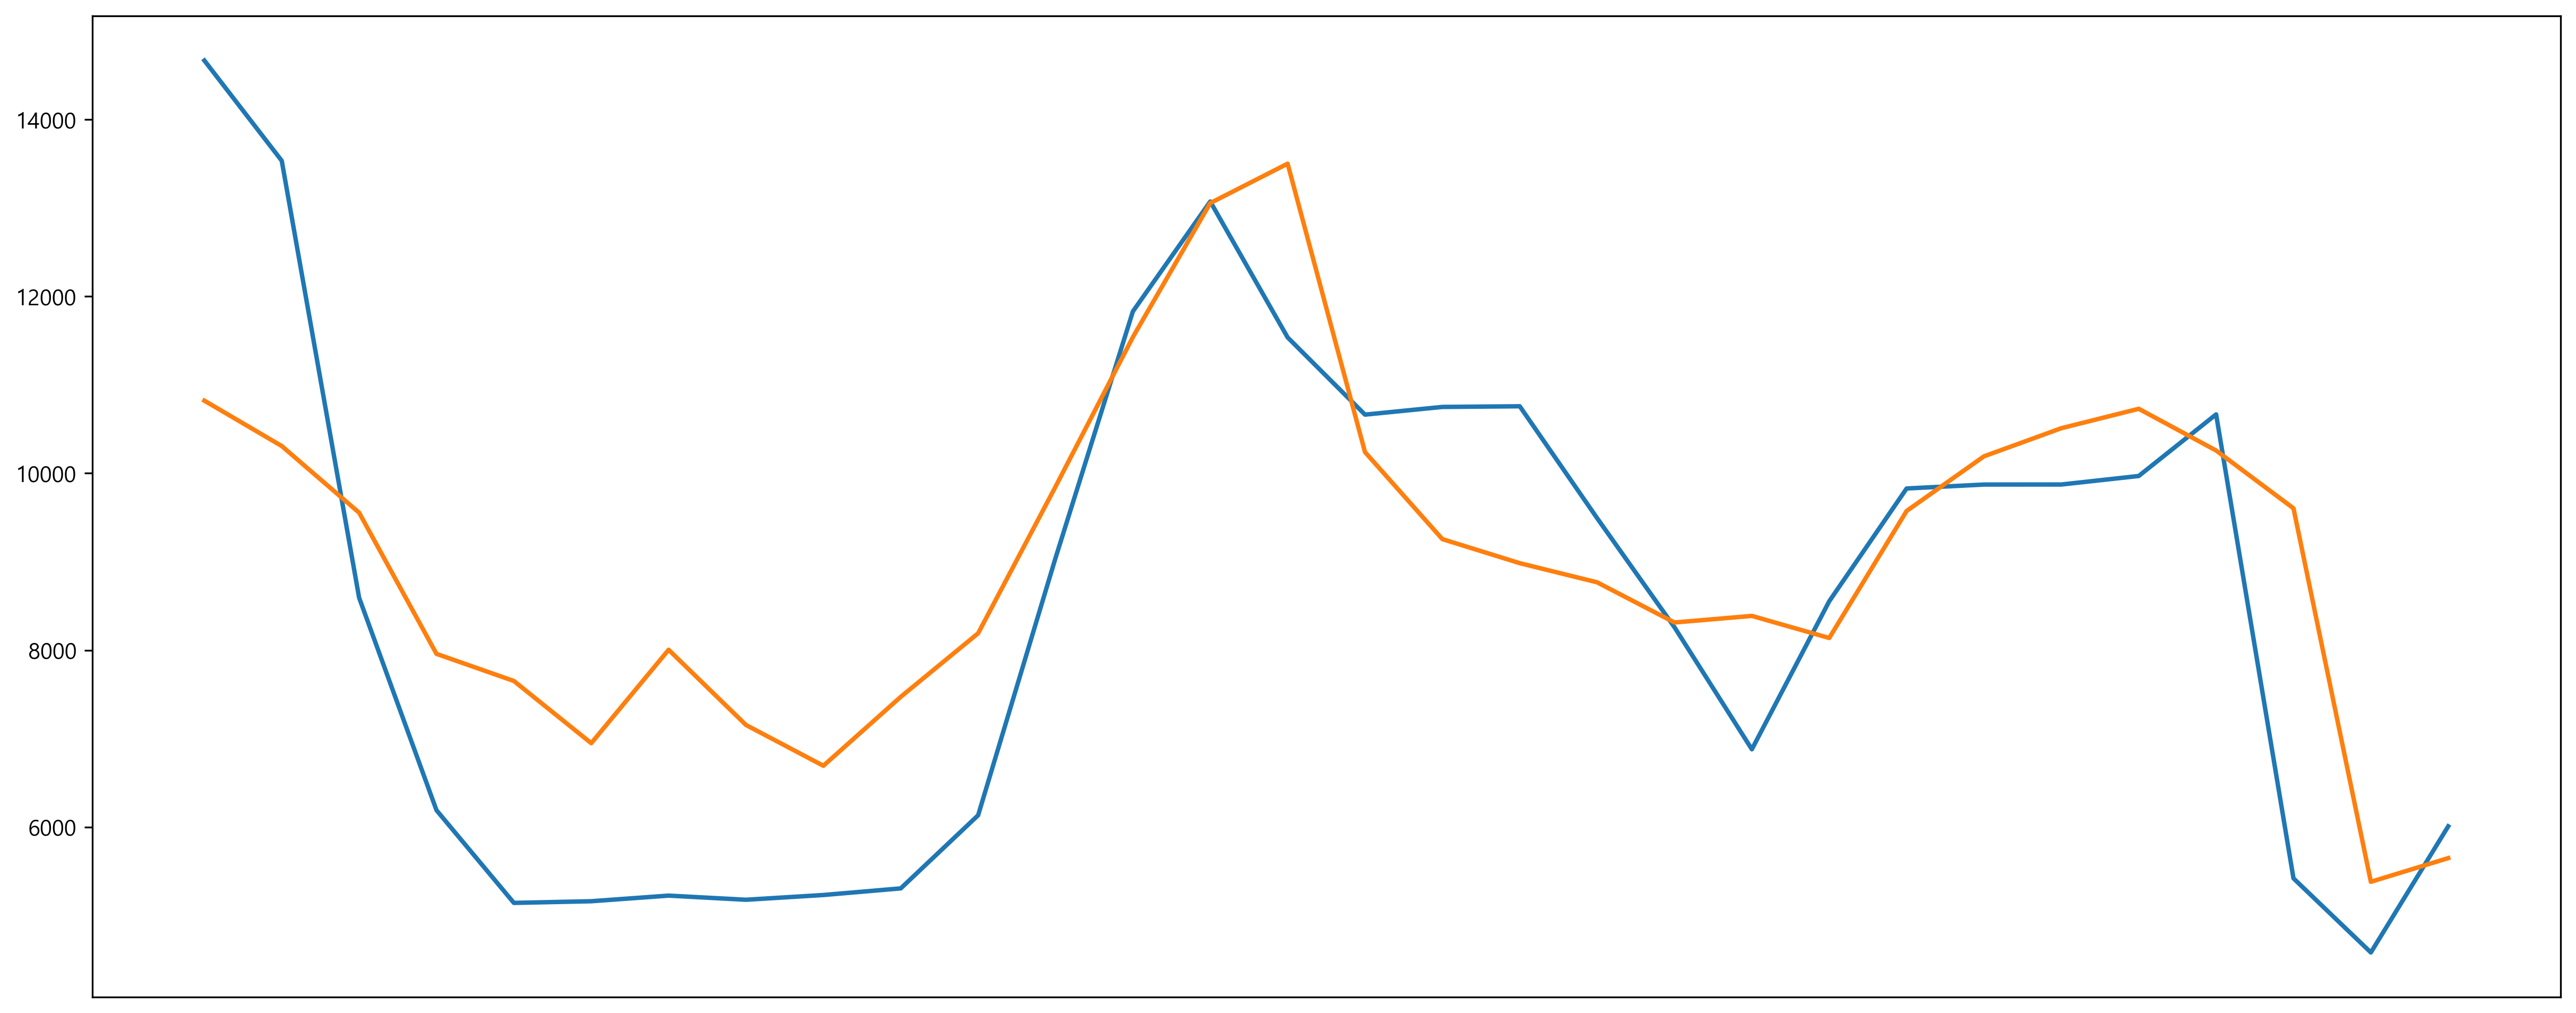

In [29]:
plt.figure(figsize=(20, 8))
plt.xticks([])
plt.plot(df.index[train_size + seq_len + 30: train_size + seq_len + 60], y_test_ori[30:60])
plt.plot(df.index[train_size + seq_len + 30: train_size + seq_len + 60], y_pred_ori[30:60])
plt.show()